In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
# read force data
force = pd.read_csv('../surfaces/JBZQ04/EXP2/JBZQ04-exp2-2023-07-21-kn.csv', header=1, names=['time', 'x_force', 'y_force'], usecols=[0,1,2])

# read displacement data
displacement = pd.read_csv('../surfaces/JBZQ04/EXP2/JBZQ04-exp2-2023-07-21-mm.csv', header=1, names=['time', 'x_disp', 'y_disp', 'y_motor_disp', 'x_motor_disp'], usecols=[0,1,2,3,4])

In [35]:
# define friction coefficient as ratio of shear force to normal force
force['friction'] = -force['x_force'] / force['y_force']


# define speed as the derivative of displacement
displacement['x_speed'] = np.gradient(displacement['x_disp'], displacement['time'])

# smooth speed data
displacement['x_speed'] = displacement['x_speed'].rolling(50).mean()

time_cutoff_left = 369
time_cutoff_right = 8100

# cut off time data before 2438 seconds
force = force[force['time'] > time_cutoff_left]
displacement = displacement[displacement['time'] > time_cutoff_left]

force = force[force['time'] < time_cutoff_right]
displacement = displacement[displacement['time'] < time_cutoff_right]

# shift time data to start at 0
force['time'] = force['time'] - time_cutoff_left
displacement['time'] = displacement['time'] - time_cutoff_left

# shift displacement data up by 0.52 mm
displacement['x_disp'] = displacement['x_disp'] + 0.52

# print last row of displacement data
print(displacement.tail(1))

                time     x_disp  y_disp  y_motor_disp  x_motor_disp   x_speed
4049999  7730.998385  75.220799  2.2722     63.892387     75.000005  0.003055


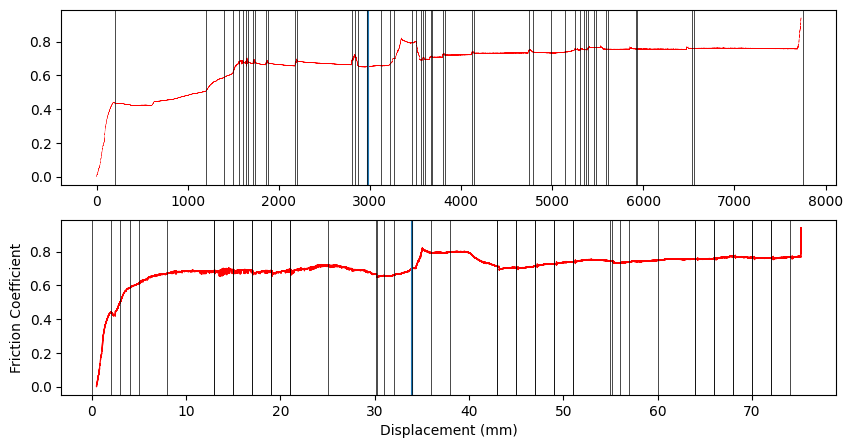

In [55]:
fig = plt.figure(figsize=(10, 5))

ax1, ax2 = fig.subplots(2, 1, sharey=False)

# plot friction vs time after 1500 seconds (sampling rate is 50 hZ)
#ax1.plot(displacement['time'][:], force['friction'][:], lw=0.5)
ax1.plot(displacement['time'][:], force['friction'][:], 'r', lw=0.2)
ax1.axvline(x=2975)
# use second y axis to plot speed
ax2.plot(displacement['x_disp'][:], force['friction'][:], 'r', lw=0.9)
ax2.axvline(x=34)
plt.xlabel('Displacement (mm)')
plt.ylabel('Friction Coefficient')

# Location of events
events_seconds = [200, 1200, 1400, 1500, 1560, 1610, 1640, 1660, 1720, 1740, 1860, 1880, 2180, 2200, 2800, 2840, 2865.5, 2965.5, 3125.5, 3225.5, 3265.5, 3465.5, 3505.5, 3555.5, 3585.5, 3605.5, 3665.5, 3685.5, 3805.5, 3825.5, 4125.5, 4145.5, 4745.5, 4785.5, 4985.5, 5145.5, 5245.5, 5305.5, 5345.5, 5375.5, 5395.5, 5455.5, 5475.5, 5595.5, 5615.5, 5915.5, 5935.5, 6535.5, 6555.5, 7755.5]

events_displacement = [0, 2, 3, 4, 5, 8, 13, 13, 15, 15, 17, 17, 19, 19, 21, 21, 25, 30.1, 30.2, 31, 32, 34, 36, 38, 43, 43, 45, 45, 47, 47, 49, 49, 51, 51, 55, 55.2, 56, 57, 60, 64, 64, 66, 66, 68, 68, 70, 70, 72, 72, 74, 74, 75]

# Plot events
for i in range(len(events_seconds)):
    ax1.axvline(x=events_seconds[i], color='black', lw=0.5)
    ax2.axvline(x=events_displacement[i], color='black', lw=0.5)


# ax2.set_ylim(0.65, 0.75)
# ax2.set_xlim(10, 30)

plt.show()

In [26]:
# save data to csv
force.to_csv('../surfaces/JBZQ04/JBZQ04_force.csv', index=False)
displacement.to_csv('../surfaces/JBZQ04/JBZQ04_displacement.csv', index=False)

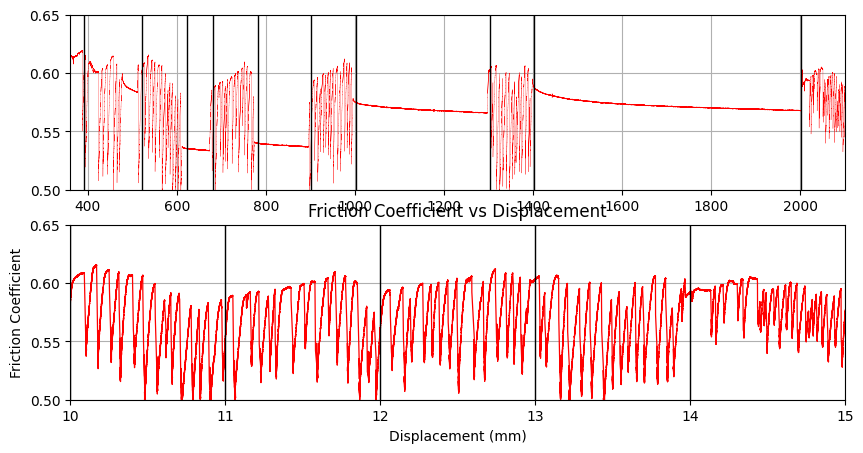

In [52]:
fig = plt.figure(figsize=(10, 5))

ax1, ax2 = fig.subplots(2, 1, sharey=False)

# plot friction vs time after 1500 seconds (sampling rate is 50 hZ)
#ax1.plot(displacement['time'][:], force['friction'][:], lw=0.5)
ax1.plot(displacement['time'][:], force['friction'][:], 'r', lw=0.2)
# use second y axis to plot speed
ax2.plot(displacement['x_disp'][:], force['friction'][:], 'r', lw=0.9)
plt.xlabel('Displacement (mm)')
plt.ylabel('Friction Coefficient')
plt.title('Friction Coefficient vs Displacement')

# Add steps as vertical lines
x_steps = np.array([2, 3, 7, 9, 10, 11, 12, 13, 14, 24, 24.2, 25, 26, 31, 36, 37, 38, 39, 40, 41, 46])

t_steps = np.array([0, 100, 180, 230, 33, 360, 460, 520, 620, 740, 840, 1140, 1240, 1840, 2840, 3040, 3200, 3300, 3400, 3450, 3550, 3580, 3680, 3740, 3840, 3960, 4060, 4360, 4460, 5060, 5560])

# subtract 2 from each step 
x_steps = x_steps

# multiply by 50 to get time step
t_steps = t_steps + 162

for step in x_steps:
    ax2.axvline(x=step, color='k', linestyle='-', lw=1)

for step in t_steps:
    ax1.axvline(x=step, color='k', linestyle='-', lw=1)

# ax1.axhline(y=0.6, color='k', linestyle='--', lw=0.5)
# ax2.axhline(y=0.6, color='k', linestyle='--', lw=0.5)

ax1.grid()
ax2.grid()


ax1.set_xlim(360, 2100)
ax2.set_xlim(10, 15)

ax1.set_ylim(0.5, 0.65)
ax2.set_ylim(0.5, 0.65)


# ax1.axvline(x=2438, color='k', linestyle='--', lw=0.5)
# ax1.axvline(x=2538, color='k', linestyle='--', lw=0.5)


plt.show()